In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat


In [5]:
# load data
data=loadmat('ex8data1.mat')
X=data['X']
Xval=data['Xval']
Yval=data['yval']

In [6]:
X.shape

(307, 2)

<function matplotlib.pyplot.show(*args, **kw)>

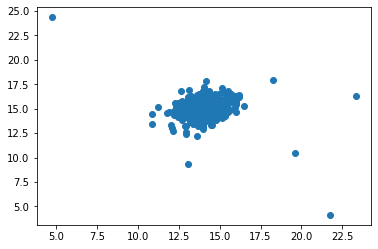

In [7]:
# plot the data
%matplotlib inline
plt.scatter(X[:,0],X[:,1])
plt.show

In [8]:
# gaussian model
mu=X.mean(axis=0)
sigma=X.var(axis=0)
mu,sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [13]:
from scipy import stats
p=np.zeros((X.shape[0],X.shape[1]))
p[:,0]=stats.norm(mu[0],sigma[0]).pdf(X[:,0])
p[:,1]=stats.norm(mu[1],sigma[1]).pdf(X[:,1])
p.shape

(307, 2)

In [15]:
# X var values
pval=np.zeros((Xval.shape[0],Xval.shape[1]))
pval[:,0]=stats.norm(mu[0],sigma[0]).pdf(Xval[:,0])
pval[:,1]=stats.norm(mu[1],sigma[1]).pdf(Xval[:,1])
pval.shape

(307, 2)

In [23]:
def select_thershold(pval,yval):
    best_epsilon=0
    best_f1=0
    f1=0
    
    step=(pval.max()-pval.min())/1000
    
    for epsilon in np.arange(pval.min(),pval.max(),step):
        preds=pval<epsilon
        
        tp=np.sum(np.logical_and(preds==1,yval==1)).astype(float)
        fp=np.sum(np.logical_and(preds==1,yval==0)).astype(float)
        fn=np.sum(np.logical_and(preds==0,yval==1)).astype(float)
        
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        
        f1=(2 * precision * recall)/(precision + recall)
        
        if(f1>best_f1):
            best_f1=f1
            best_epsilon=epsilon
    return best_epsilon,best_f1

epsilon,f1=select_thershold(pval,Yval)

epsilon,f1

<ipython-input-23-5daa4fa7d721>:15: RuntimeWarning: invalid value encountered in double_scalars
  precision=tp/(tp+fp)


(0.009566706005956842, 0.7142857142857143)

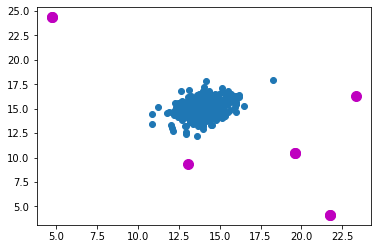

In [24]:
anomalies=np.where(p<epsilon)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[anomalies[0],0],X[anomalies[0],1],s=100,color='m')